# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []
# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+f'q={city}&units=metric&APPID={weather_api_key}'
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kalemie
-5.9475
29.1947
20.73
Processing Record 2 of Set 1 | breyten
-26.3018
29.987
16.74
Processing Record 3 of Set 1 | utrik
11.2278
169.8474
26.2
Processing Record 4 of Set 1 | el bolson
-41.9667
-71.5167
24.68
Processing Record 5 of Set 1 | college
64.8569
-147.8028
-25.44
Processing Record 6 of Set 1 | mount pearl
47.5166
-52.7813
-6.03
Processing Record 7 of Set 1 | yellowknife
62.456
-114.3525
-26.44
Processing Record 8 of Set 1 | waitangi
-43.9535
-176.5597
17.12
Processing Record 9 of Set 1 | invercargill
-46.4
168.35
20.57
Processing Record 10 of Set 1 | westport
41.1415
-73.3579
-0.05
Processing Record 11 of Set 1 | ust-tsilma
65.441
52.1498
-8.13
Processing Record 12 of Set 1 | isafjordur
66.0755
-23.124
-2.31
Processing Record 13 of Set 1 | udachny
66.4167
112.4
-31.68
Processing Record 14 of Set 1 | hawaiian paradise park
19.5933
-154.9731
29.94
Processing Record 15 of Set 1 | port

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kalemie,-5.9475,29.1947,20.73,88,100,1.24,CD,1738278155
1,breyten,-26.3018,29.9870,16.74,83,72,1.26,ZA,1738278133
2,utrik,11.2278,169.8474,26.20,71,76,5.81,MH,1738278158
3,el bolson,-41.9667,-71.5167,24.68,27,0,3.98,AR,1738278030
4,college,64.8569,-147.8028,-25.44,71,100,0.68,US,1738278160


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kalemie,-5.9475,29.1947,20.73,88,100,1.24,CD,1738278155
1,breyten,-26.3018,29.9870,16.74,83,72,1.26,ZA,1738278133
2,utrik,11.2278,169.8474,26.20,71,76,5.81,MH,1738278158
3,el bolson,-41.9667,-71.5167,24.68,27,0,3.98,AR,1738278030
4,college,64.8569,-147.8028,-25.44,71,100,0.68,US,1738278160


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

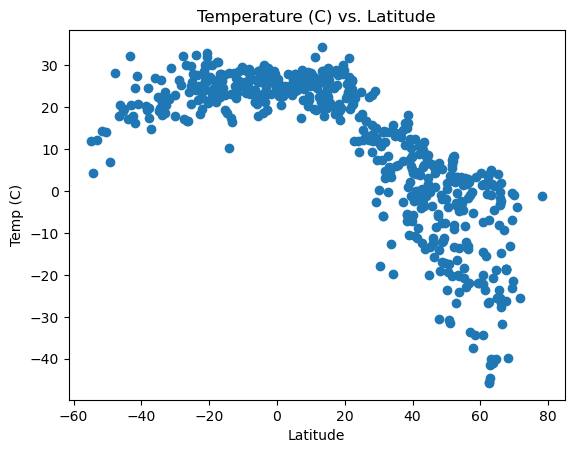

In [90]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
# Incorporate the other graph properties
plt.title('Temperature (C) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temp (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

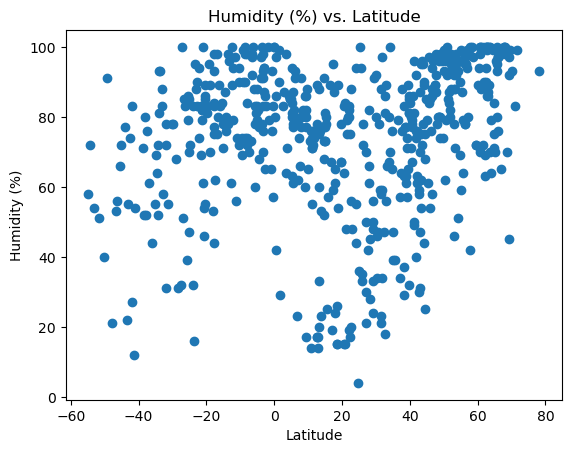

In [89]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

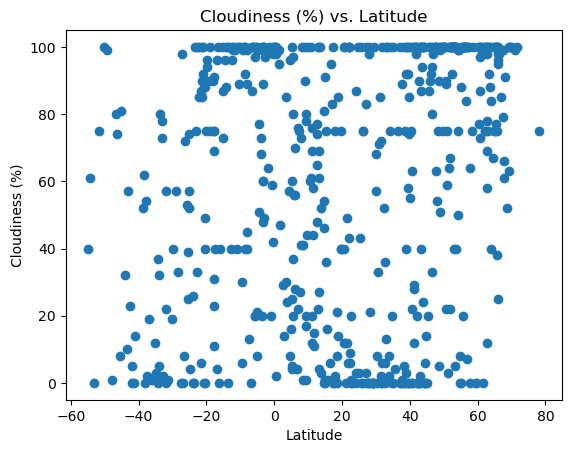

In [91]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

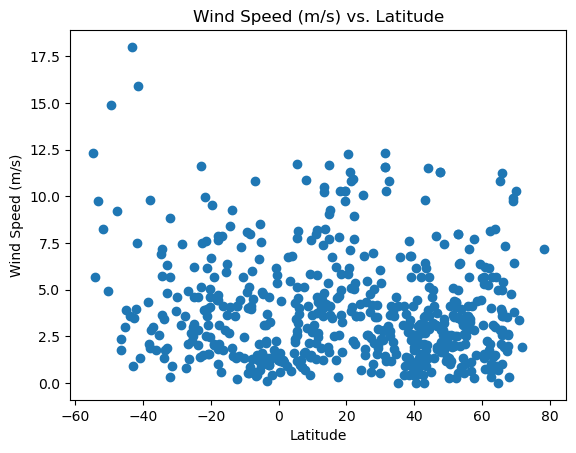

In [65]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])
# Incorporate the other graph properties
plt.title('Wind Speed (m/s) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x,y,xlabel,ylabel,title):
    plt.scatter(x,y)    
    (slope, intercept, r_value, p_value, std_err) = linregress(x,y)
    line = slope *x+ intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x, line, color='red', label=f'Fitted')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(line_eq,(0,30),fontsize=15,color="red")
    plt.legend(loc='best')
    print(f"The r-squared is: {r_value**2}")

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,utrik,11.2278,169.8474,26.20,71,76,5.81,MH,1738277367
4,college,64.8569,-147.8028,-26.00,70,75,1.54,US,1738277369
5,mount pearl,47.5166,-52.7813,-6.14,90,100,10.29,CA,1738277371
6,yellowknife,62.4560,-114.3525,-26.99,93,100,1.54,CA,1738277372
9,westport,41.1415,-73.3579,0.18,48,0,3.09,US,1738277086


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kalemie,-5.9475,29.1947,20.73,88,100,1.24,CD,1738277364
1,breyten,-26.3018,29.9870,16.74,83,72,1.26,ZA,1738277087
3,el bolson,-41.9667,-71.5167,24.68,27,0,3.98,AR,1738277298
7,waitangi,-43.9535,-176.5597,17.12,78,32,3.13,NZ,1738277373
8,invercargill,-46.4000,168.3500,21.68,54,74,1.34,NZ,1738277367


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6800559662617159


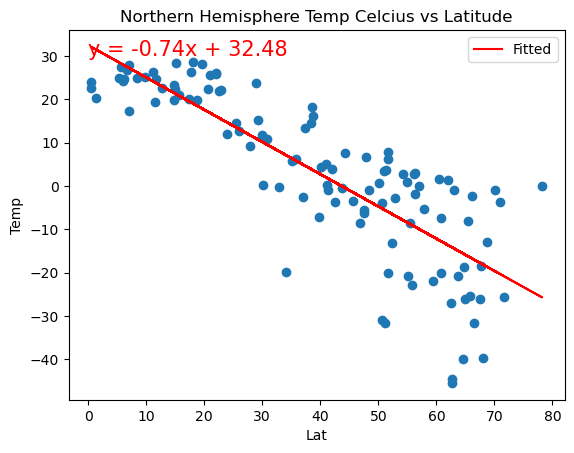

In [77]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Lat',"Temp","Northern Hemisphere Temp Celcius vs Latitude")

The r-squared is: 0.34956296069764614


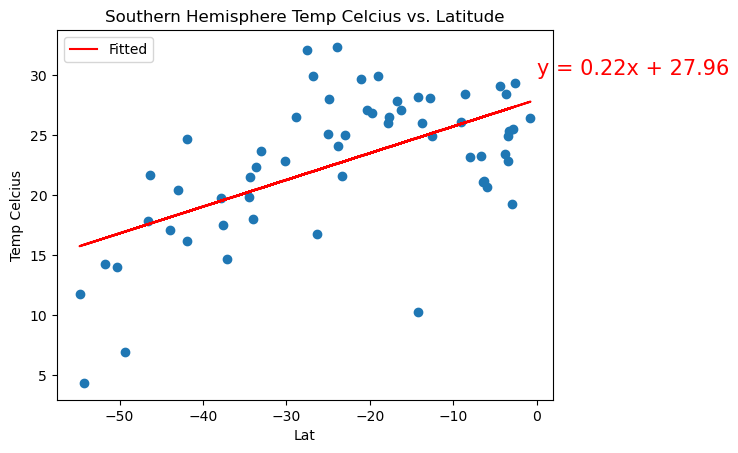

In [67]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Lat',"Temp Celcius","Southern Hemisphere Temp Celcius vs. Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.07026895421650724


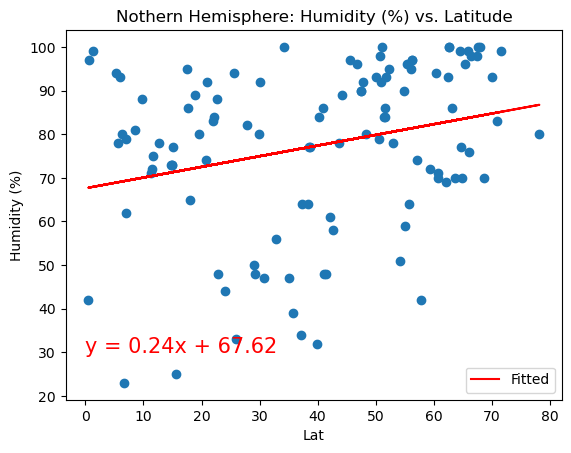

In [69]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Lat',"Humidity (%)",'Nothern Hemisphere: Humidity (%) vs. Latitude')

The r-squared is: 0.2614638795388271


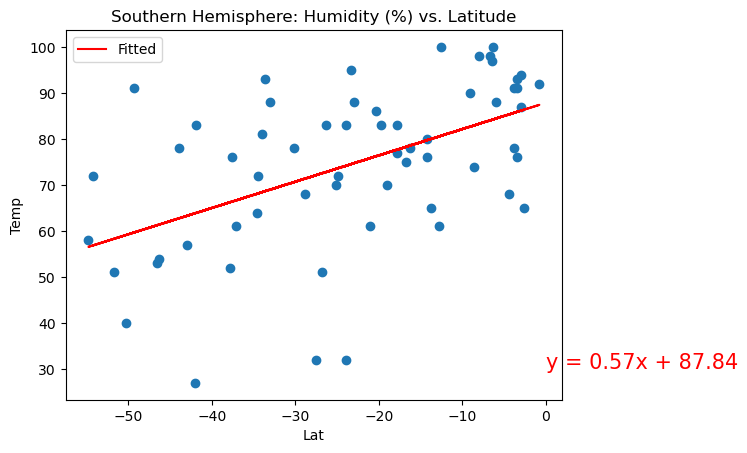

In [70]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Lat',"Temp","Southern Hemisphere: Humidity (%) vs. Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.10739291941957473


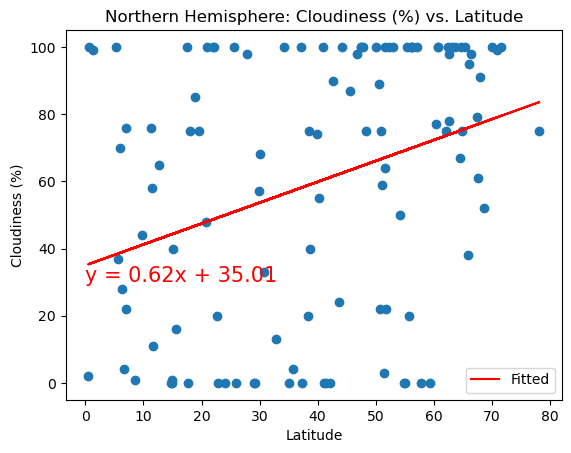

In [81]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Latitude','Cloudiness (%)','Northern Hemisphere: Cloudiness (%) vs. Latitude')

The r-squared is: 0.07691619145811059


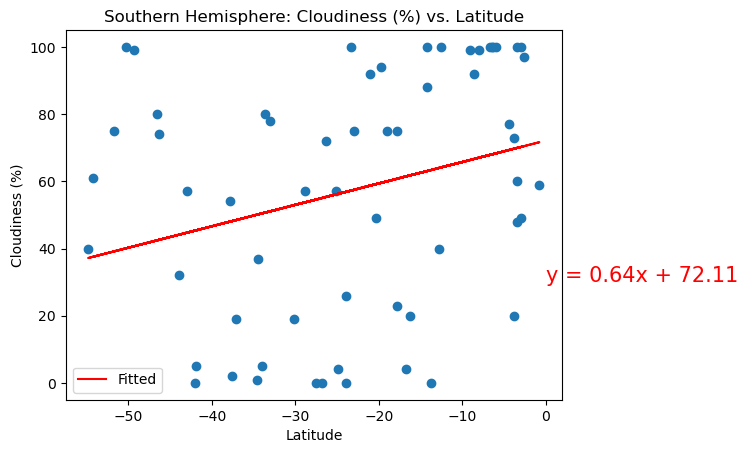

In [82]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Latitude','Cloudiness (%)','Southern Hemisphere: Cloudiness (%) vs. Latitude')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0029666049282247764


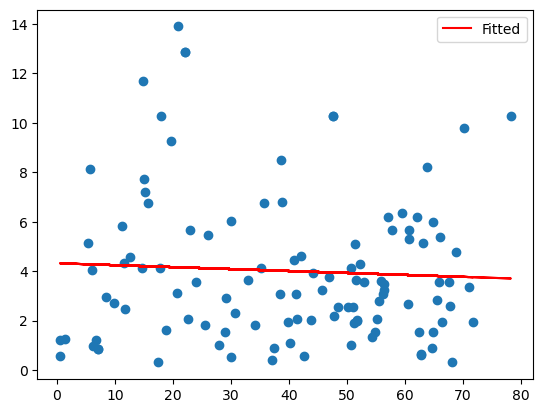

In [56]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Lat',"Wind Speed (m/s)","Northern Hemisphere: Wind Speed (m/s) vs. Latitude")

The r-squared is: 0.12700730374272357


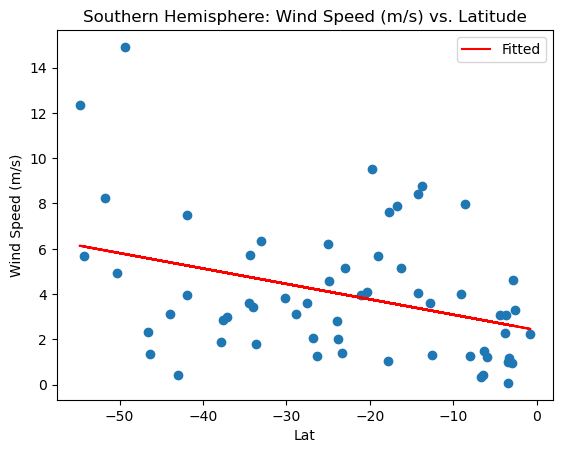

In [87]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Lat',"Wind Speed (m/s)","Southern Hemisphere: Wind Speed (m/s) vs. Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE